In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

># Задача 2

In [20]:
N = 2000
L = 3000
h = L / N
T = 1
lam = 1500
rho = 1000
tau = 0.4 * h / lam
M = round(T / tau)
U = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
v_l = 0.001
p_r = 0.5

In [21]:
def convert(mat, U, f, e):
    W = np.zeros(N, dtype=[(e[0], np.float64), (e[1], np.float64)])
    for i in range(N):
        W[i][e[0]] = U[i][f[0]] * mat[0][0] + U[i][f[1]] * mat[0][1]
        W[i][e[1]] = U[i][f[0]] * mat[1][0] + U[i][f[1]] * mat[1][1]
    return W

In [22]:
def p_init(p):
    for i in range(N):
        if (i * h >= L / 3) and (i * h <= 2 * L / 3):
            p[i] = 1
        else:
            p[i] = 0

In [23]:
def v_init(v):
    for i in range(N):
        v[i] = 0

In [24]:
p_init(U['p'])
v_init(U['v'])

In [25]:
mat = np.array([[1, -1], [rho * lam, rho * lam]])
W = convert(mat, U, f=('v', 'p'), e=('1', '2'))

In [26]:
def D1_solver(h, N, M, lam, tau, Q_0):
    Q = Q_0.copy()
    Q_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
    for j in range(M):
        for i in range (1, N):
            x_star = -lam * tau
            b = Q['2'][i]
            a = (Q['2'][i - 1] - b) / (-h)
            Q_new['2'][i] = a * x_star + b
        for i in range (0, N - 1):
            x_star = lam * tau
            b = Q['1'][i]
            a = (Q['1'][i + 1] - b) / h
            Q_new['1'][i] = a * x_star + b
        Q_new['2'][0] = 2 * rho * lam * (v_l - Q_new['1'][0] / 2)
        Q_new['1'][N - 1] = -2 * (p_r - Q_new['2'][N - 1] / (2 * rho * lam))
        Q = Q_new
    return Q_new

In [27]:
W_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
W_new = D1_solver(h, N, M, lam, tau, W)
x = np.linspace(0, L, N)
mat_obr = np.array([[1 / 2, 1 / (2 * rho * lam)], [-1 / 2, 1 / (2 * rho * lam)]])
U_new = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
U_new = convert(mat_obr, W_new, f=('1', '2'), e=('v', 'p'))

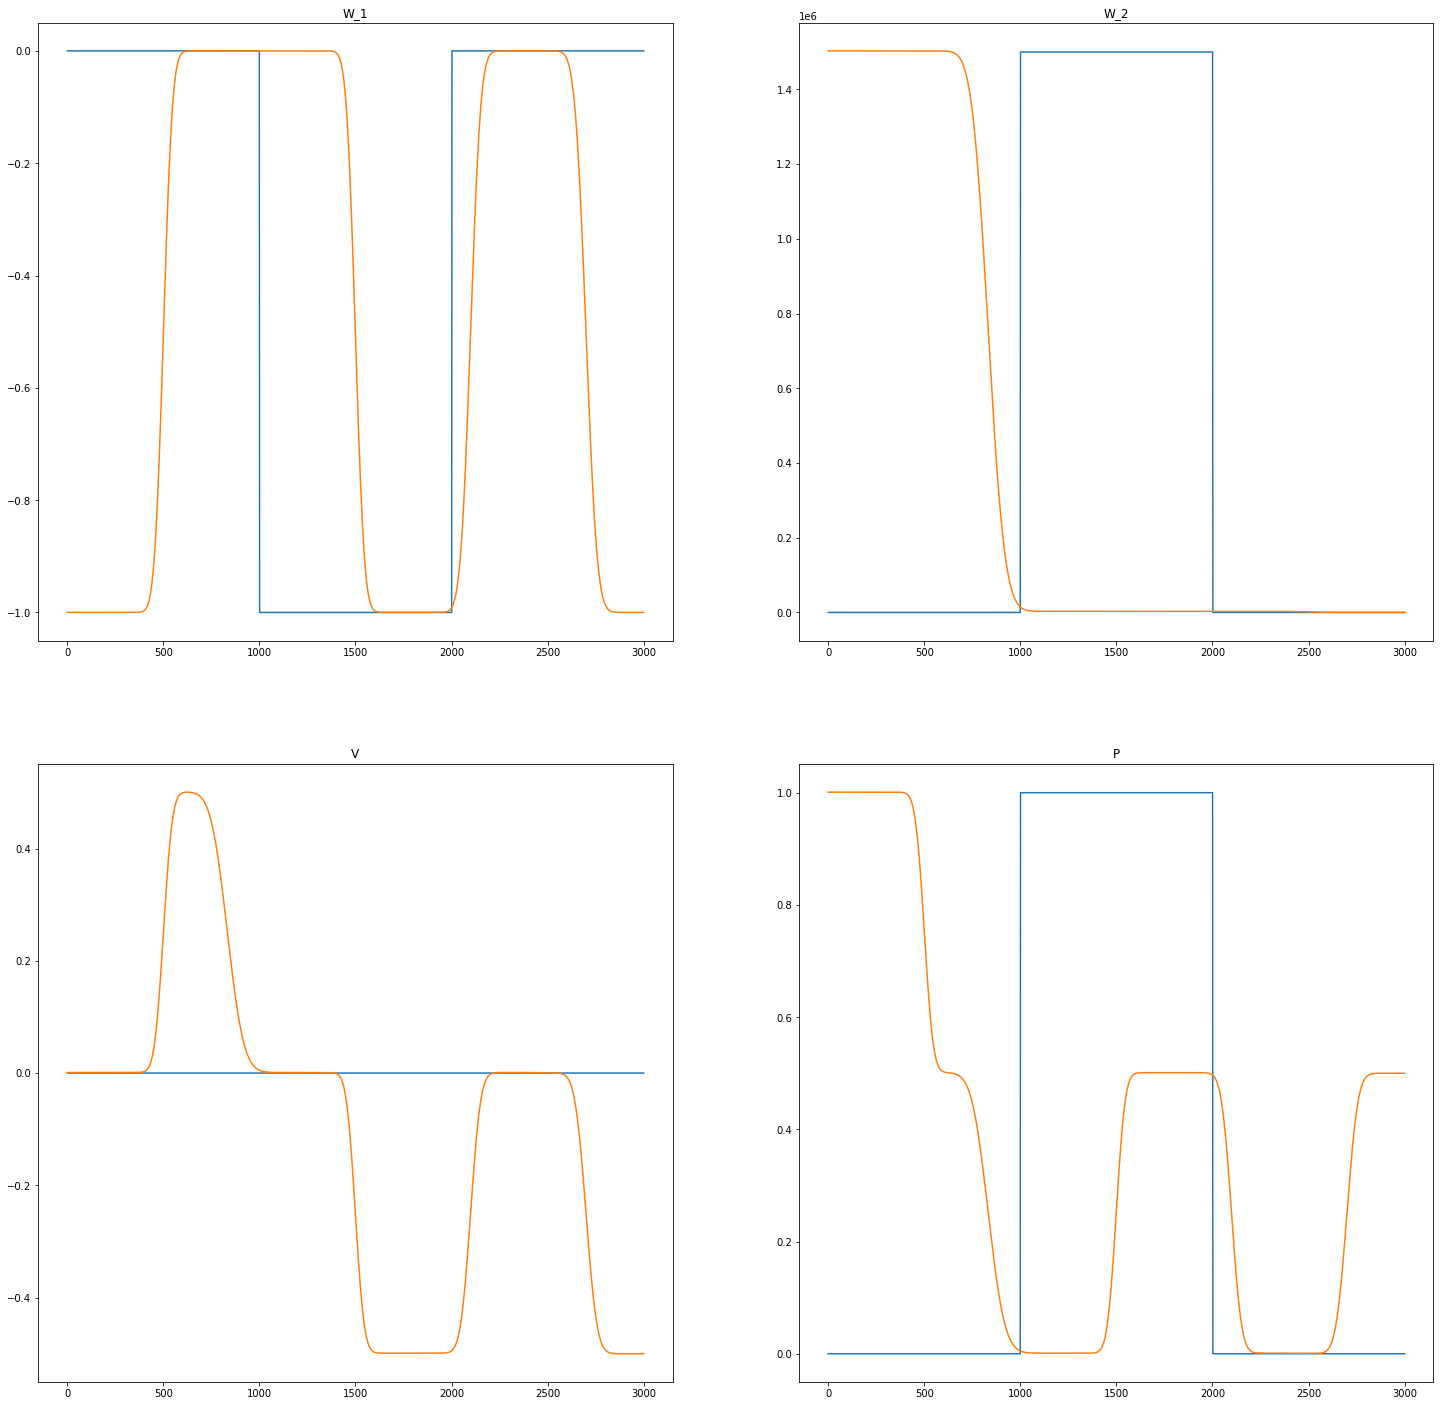

In [28]:
plt.figure(figsize=(25,25))
plt.subplot(2, 2, 1)
plt.title('W_1')
plt.plot(x, W['1'])
plt.plot(x, W_new['1'])
plt.subplot(2, 2, 2)
plt.title('W_2')
plt.plot(x, W['2'])
plt.plot(x, W_new['2'])
plt.subplot(2, 2, 3)
plt.title('V')
plt.plot(x, U['v'])
plt.plot(x, U_new['v'])
plt.subplot(2, 2, 4)
plt.title('P')
plt.plot(x, U['p'])
plt.plot(x, U_new['p'])

># Задача 3

In [29]:
N = 2000
L = 600
h = L / N
T = 1
lam1 = 500
lam2 = 500
rho1 = 400
rho2 = 400
lam = np.hstack((np.full(N // 2, lam1), np.full(N // 2, lam2)))
rho = np.hstack((np.full(N // 2, rho1), np.full(N // 2, rho2)))
tau = 0.4 * h / lam
M = round(T / tau.mean())
U = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])

In [30]:
def convert(mat, U, f, e):
    W = np.zeros(N, dtype=[(e[0], np.float64), (e[1], np.float64)])
    for i in range(N):
        W[i][e[0]] = U[i][f[0]] * mat[0][0][i] + U[i][f[1]] * mat[0][1][i]
        W[i][e[1]] = U[i][f[0]] * mat[1][0][i] + U[i][f[1]] * mat[1][1][i]
    return W

In [31]:
def p_init(p):
    for i in range(N):
        if (i * h >= 0) and (i * h <= L / 10):
            p[i] = 1
        else:
            p[i] = 0

In [32]:
def v_init(v):
    for i in range(N):
        if (i * h >= 0) and (i * h <= L / 10):
            v[i] = 1 * rho[i] * lam[i]
        else:
            v[i] = 0

In [33]:
p_init(U['p'])
v_init(U['v'])

In [34]:
mat = np.array([[np.ones(N), -np.ones(N)], [rho * lam, rho * lam]])
W = convert(mat, U, f=('v', 'p'), e=('1', '2'))

In [35]:
def D1_solver(h, N, M, lam, tau, rho, Q_0):
    Q = Q_0.copy()
    Q_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
    for j in range(M):
        for i in range (1, N):
            x_star = -lam[i] * tau[i]
            b = Q['2'][i]
            a = (Q['2'][i - 1] - b) / (-h)
            Q_new['2'][i] = a * x_star + b
        for i in range (0, N - 1):
            x_star = lam[i] * tau[i]
            b = Q['1'][i]
            a = (Q['1'][i + 1] - b) / h
            Q_new['1'][i] = a * x_star + b
        Q_new['2'][0] = 2 * rho[i] * lam[i] * (v_l - Q_new['1'][0] / 2) #здесь должно быть условие на границе, но яне могу его посчитать
        Q_new['1'][N - 1] = -2 * (p_r - Q_new['2'][N - 1] / (2 * rho[i] * lam[i])) #здесь тоже
        Q = Q_new
    return Q_new

In [36]:
W_new = np.zeros(N, dtype=[('1', np.float64), ('2', np.float64)])
W_new = D1_solver(h, N, M, lam, tau, rho, W)
x = np.linspace(0, L, N)
mat_obr = np.array([[np.ones(N) / 2, np.ones(N) / (2 * rho * lam)], [-np.ones(N) / 2, np.ones(N) / (2 * rho * lam)]])
U_new = np.zeros(N, dtype=[('v', np.float64), ('p', np.float64)])
U_new = convert(mat_obr, W_new, f=('1', '2'), e=('v', 'p'))

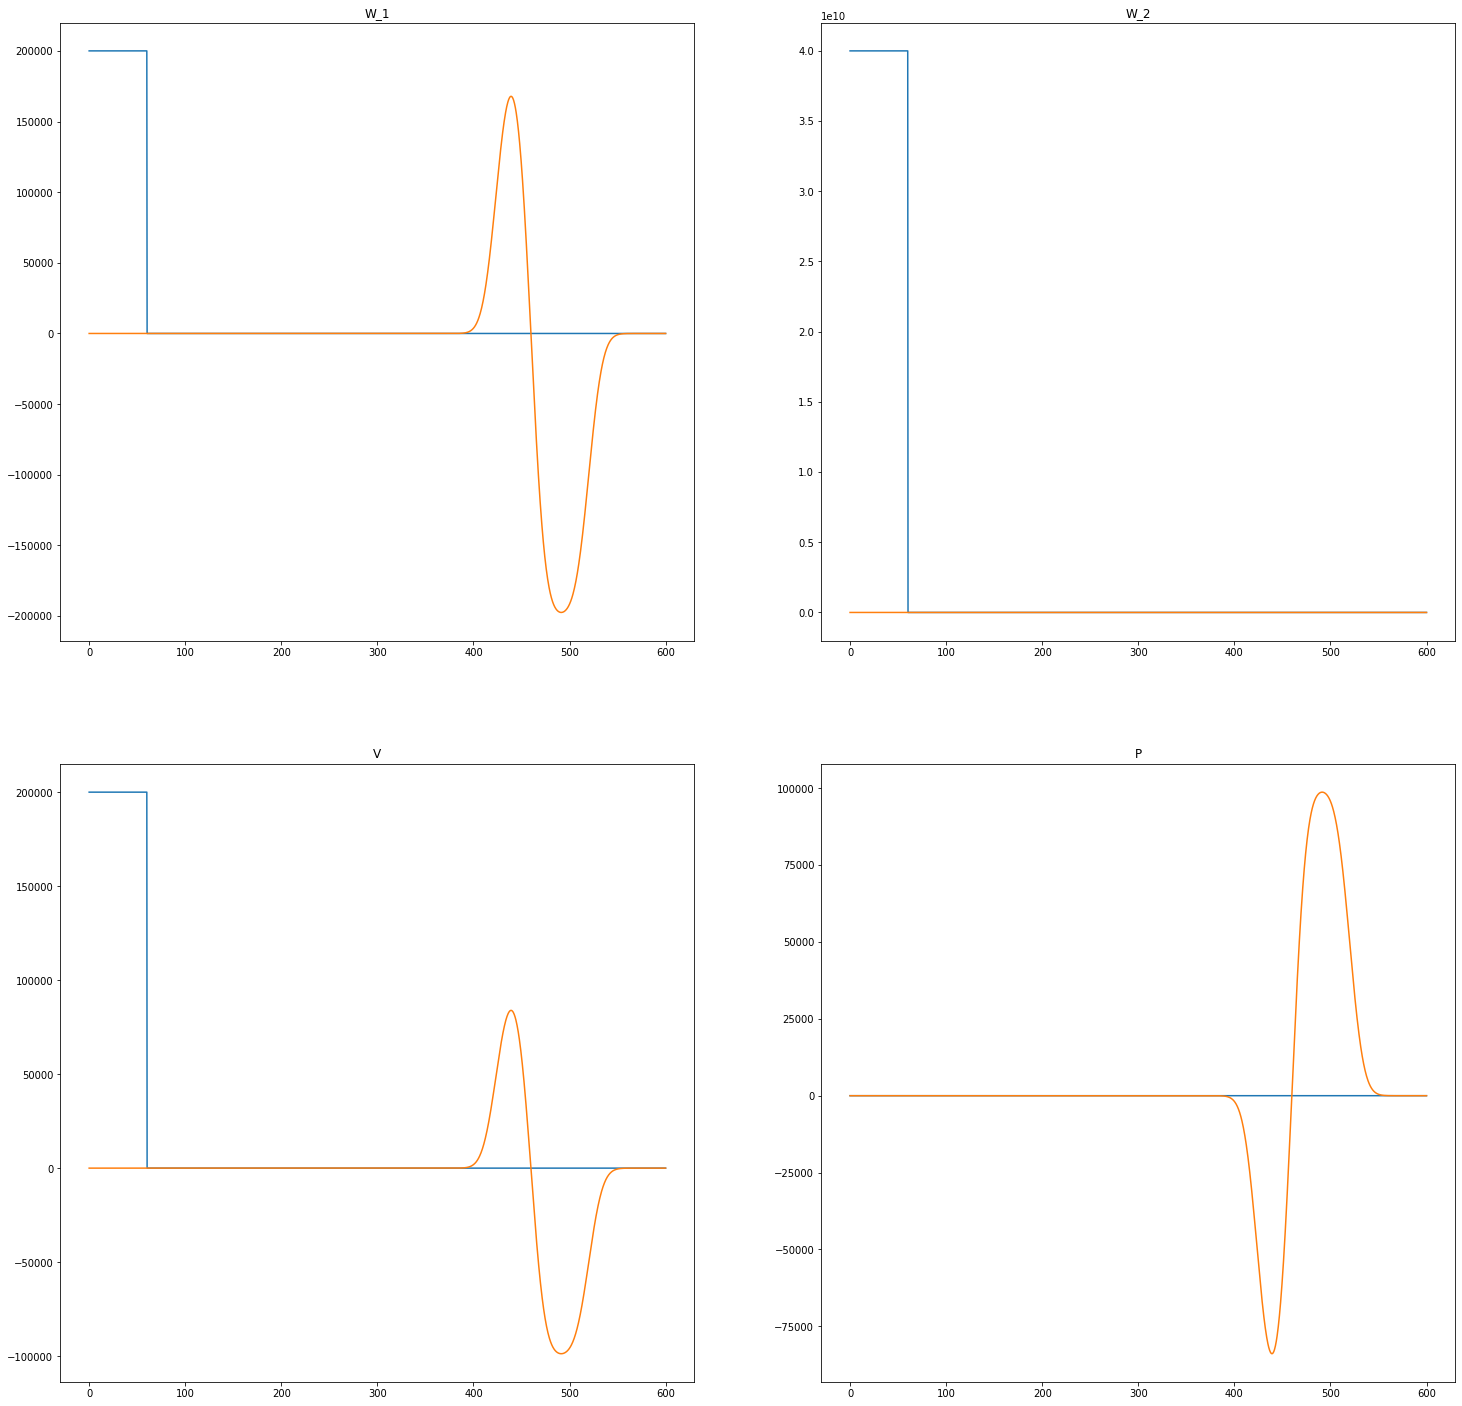

In [37]:
plt.figure(figsize=(25,25))
plt.subplot(2, 2, 1)
plt.title('W_1')
plt.plot(x, W['1'])
plt.plot(x, W_new['1'])
plt.subplot(2, 2, 2)
plt.title('W_2')
plt.plot(x, W['2'])
plt.plot(x, W_new['2'])
plt.subplot(2, 2, 3)
plt.title('V')
plt.plot(x, U['v'])
plt.plot(x, U_new['v'])
plt.subplot(2, 2, 4)
plt.title('P')
plt.plot(x, U['p'])
plt.plot(x, U_new['p'])